## Quais dados coletar
Server:
- Acc
- Loss
- Round
- Amount of selected clients per round
- Amount of not selected clients per round
##Client:
### 'round', 'cid', 'acc', 'loss', 'model_size', 'participate', 'selected'
- Acc
- Loss
- Round
- Engaged
- Model size


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Train Non-IID com Test IID

<Axes: xlabel='round', ylabel='fed_acc'>

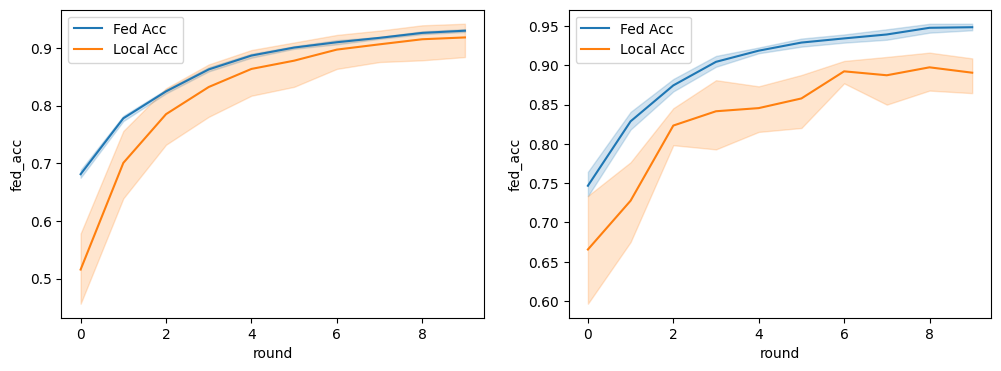

In [15]:
df_train = pd.read_csv('logs-cases/train.csv', names=['cid', 'fed_acc', 'local_acc'])
df_test  = pd.read_csv('logs/random/MNIST/10/engaged_0.4/dirichlet_0.1/c-eval.csv', names=['cid', 'fed_acc', 'local_acc'])

df_train['round'] = df_train.index//10
df_test['round']  = df_test.index//10

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x='round', y='fed_acc', data=df_train, ax=ax[0], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_train, ax=ax[0], label='Local Acc')

sns.lineplot(x='round', y='fed_acc', data=df_test, ax=ax[1], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_test, ax=ax[1], label='Local Acc')

# Non-IID


<Axes: xlabel='round', ylabel='fed_acc'>

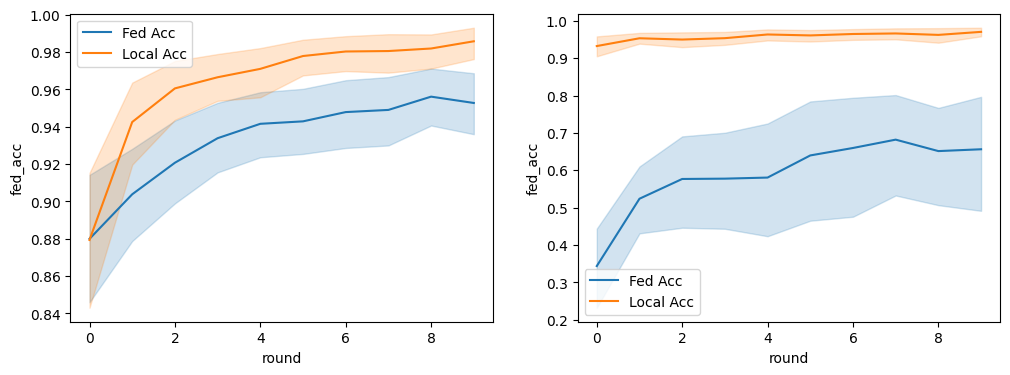

In [16]:
df_train = pd.read_csv('logs-cases/train_niid.csv', names=['cid', 'fed_acc', 'local_acc'])
df_test  = pd.read_csv('logs-cases/eval_niid.csv', names=['cid', 'fed_acc', 'local_acc'])

df_train['round'] = df_train.index//10
df_test['round']  = df_test.index//10

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x='round', y='fed_acc', data=df_train, ax=ax[0], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_train, ax=ax[0], label='Local Acc')

sns.lineplot(x='round', y='fed_acc', data=df_test, ax=ax[1], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_test, ax=ax[1], label='Local Acc')

# IID

<Axes: xlabel='round', ylabel='fed_acc'>

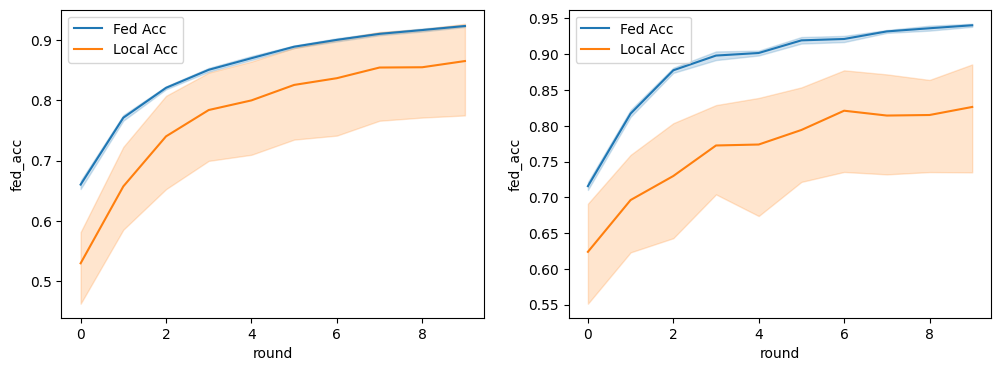

In [17]:
df_train = pd.read_csv('logs-cases/train-iid.csv', names=['cid', 'fed_acc', 'local_acc'])
df_test  = pd.read_csv('logs-cases/eval-iid.csv', names=['cid', 'fed_acc', 'local_acc'])

df_train['round'] = df_train.index//10
df_test['round']  = df_test.index//10

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x='round', y='fed_acc', data=df_train, ax=ax[0], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_train, ax=ax[0], label='Local Acc')

sns.lineplot(x='round', y='fed_acc', data=df_test, ax=ax[1], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_test, ax=ax[1], label='Local Acc')

# CIA - IID

<Axes: xlabel='round', ylabel='fed_acc'>

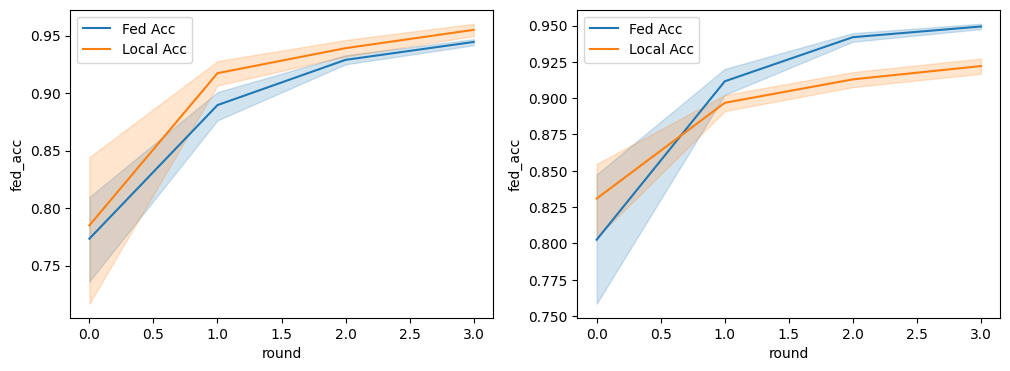

In [18]:
df_train = pd.read_csv('logs-cia/iid-train.csv', names=['cid', 'fed_acc', 'local_acc'])
df_test  = pd.read_csv('logs-cia/iid-eval.csv', names=['cid', 'fed_acc', 'local_acc'])

df_train['round'] = df_train.index//10
df_test['round']  = df_test.index//10

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x='round', y='fed_acc', data=df_train, ax=ax[0], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_train, ax=ax[0], label='Local Acc')

sns.lineplot(x='round', y='fed_acc', data=df_test, ax=ax[1], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_test, ax=ax[1], label='Local Acc')

# CIA - NO-IID

<Axes: xlabel='round', ylabel='fed_acc'>

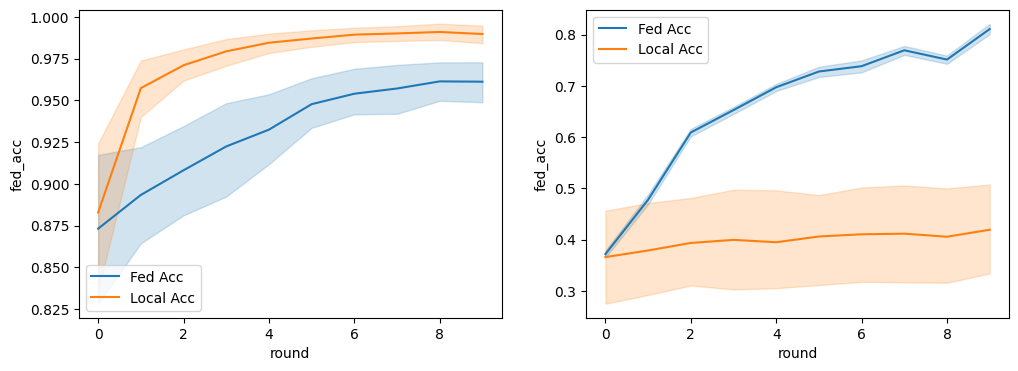

In [19]:
df_train = pd.read_csv('logs-cia/train.csv', names=['cid', 'fed_acc', 'local_acc'])
df_test  = pd.read_csv('logs-cia/eval.csv', names=['cid', 'fed_acc', 'local_acc'])

df_train['round'] = df_train.index//10
df_test['round']  = df_test.index//10

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x='round', y='fed_acc', data=df_train, ax=ax[0], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_train, ax=ax[0], label='Local Acc')

sns.lineplot(x='round', y='fed_acc', data=df_test, ax=ax[1], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_test, ax=ax[1], label='Local Acc')

# Train Non-IID with Test IID

<Axes: xlabel='round', ylabel='fed_acc'>

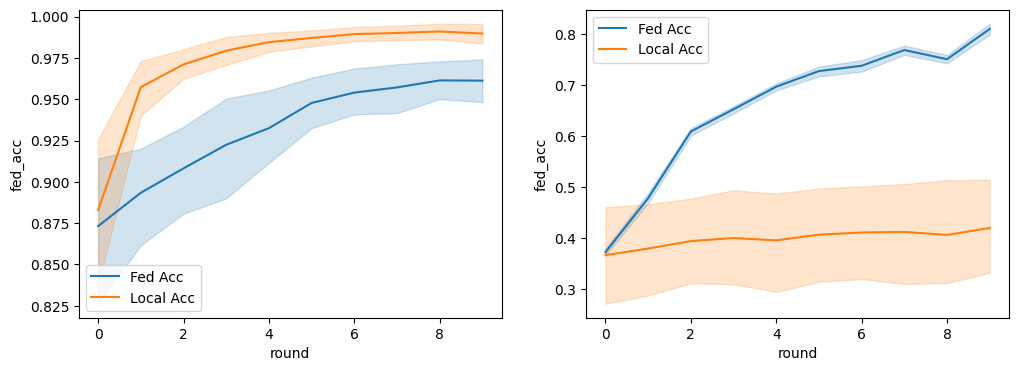

In [20]:
df_train = pd.read_csv('logs-cia/train.csv', names=['cid', 'fed_acc', 'local_acc'])
df_test  = pd.read_csv('logs-cia/eval.csv', names=['cid', 'fed_acc', 'local_acc'])

df_train['round'] = df_train.index//10
df_test['round']  = df_test.index//10

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x='round', y='fed_acc', data=df_train, ax=ax[0], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_train, ax=ax[0], label='Local Acc')

sns.lineplot(x='round', y='fed_acc', data=df_test, ax=ax[1], label='Fed Acc')
sns.lineplot(x='round', y='local_acc', data=df_test, ax=ax[1], label='Local Acc')

## Com somente 2 clientes da federação

## IID Com 3 modelos

<Axes: xlabel='round', ylabel='acc'>

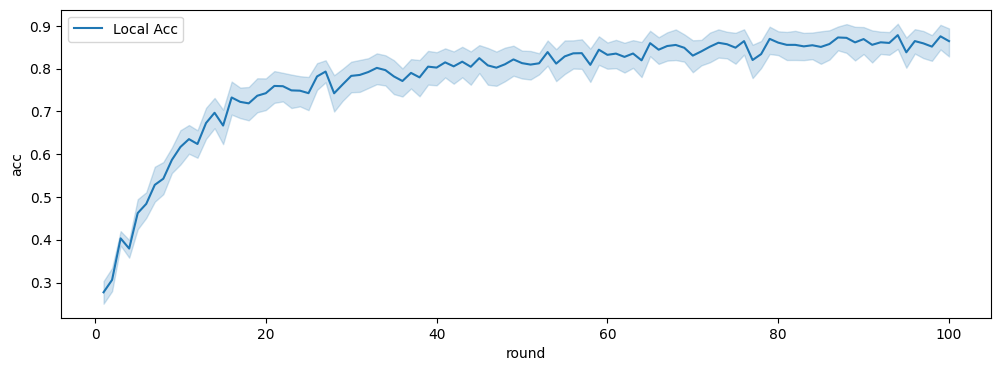

In [9]:
df_test  = pd.read_csv('logs/random/MNIST/50/engaged_0.25/dirichlet_0.1/c-eval.csv', names=['round', 'cid', 'acc', 'loss', 'engaged', 'selected'])

fig, ax = plt.subplots(figsize=(12, 4))

sns.lineplot(x='round', y='acc', data=df_test, ax=ax, label='Local Acc')

## No-idd com 3 modelos

<Axes: title={'center': 'Evaluate'}, xlabel='round', ylabel='fed_acc'>

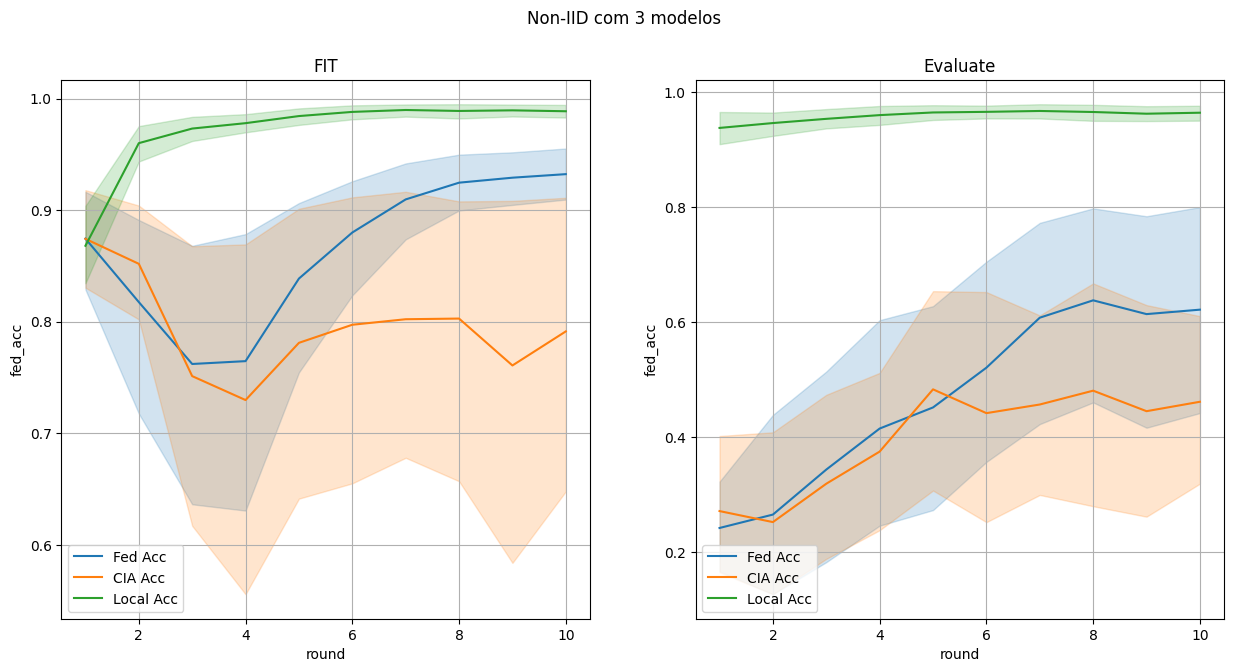

In [22]:
df_train = pd.read_csv('all-cases/no-idd-train.csv', names=['cid', 'fed_acc', 'cia_acc', 'local_acc', "participate", 'round'])
df_test  = pd.read_csv('all-cases/no-idd-eval.csv', names=['cid', 'fed_acc', 'cia_acc', 'local_acc', "participate", 'round'])

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

plt.suptitle("Non-IID com 3 modelos")
ax[0].set_title("FIT")
ax[1].set_title("Evaluate")

ax[0].grid(True)
ax[1].grid(True)
sns.lineplot(x='round', y='fed_acc', data=df_train, ax=ax[0], label='Fed Acc')
sns.lineplot(x='round', y='cia_acc', data=df_train, ax=ax[0], label='CIA Acc')
sns.lineplot(x='round', y='local_acc', data=df_train, ax=ax[0], label='Local Acc')

sns.lineplot(x='round', y='fed_acc', data=df_test, ax=ax[1], label='Fed Acc')
sns.lineplot(x='round', y='cia_acc', data=df_test, ax=ax[1], label='CIA Acc')
sns.lineplot(x='round', y='local_acc', data=df_test, ax=ax[1], label='Local Acc')

# Train Non-IID com Test IID

(0.0, 11.0)

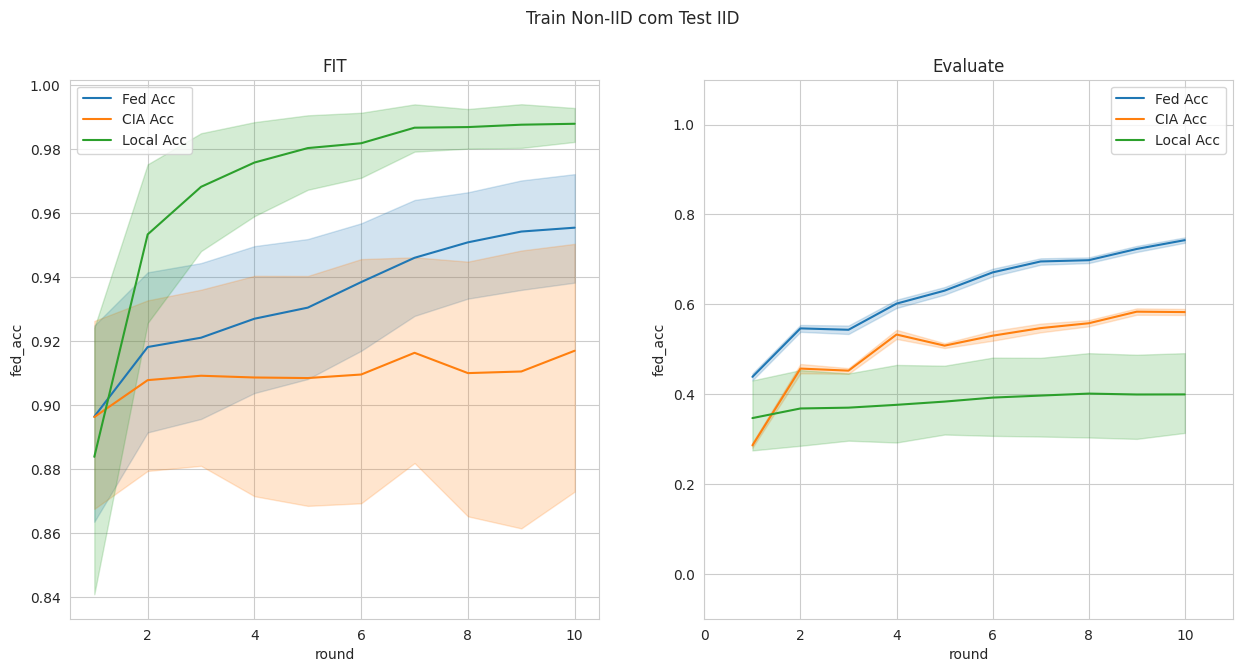

In [154]:
df_train = pd.read_csv('all-cases/train.csv', names=['cid', 'fed_acc',"cia_acc", 'local_acc', "participate", 'round'])
df_test  = pd.read_csv('all-cases/eval.csv', names=['cid', 'fed_acc',"cia_acc", 'local_acc', "participate", 'round'])

# df_train['round'] = df_train.index//10
# df_test['round']  = df_test.index//10

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plt.suptitle("Train Non-IID com Test IID")
ax[0].set_title("FIT")
ax[1].set_title("Evaluate")

ax[0].grid(True)
ax[1].grid(True)
sns.lineplot(x='round', y='fed_acc', data=df_train, ax=ax[0], label='Fed Acc')
sns.lineplot(x='round', y='cia_acc', data=df_train, ax=ax[0], label='CIA Acc')
sns.lineplot(x='round', y='local_acc', data=df_train, ax=ax[0], label='Local Acc')

sns.lineplot(x='round', y='fed_acc', data=df_test, ax=ax[1], label='Fed Acc')
sns.lineplot(x='round', y='cia_acc', data=df_test, ax=ax[1], label='CIA Acc')
sns.lineplot(x='round', y='local_acc', data=df_test, ax=ax[1], label='Local Acc')
plt.ylim(-0.1, 1.1)
plt.xlim(df_train.min()['round']-1, df_train.max()['round']+1)

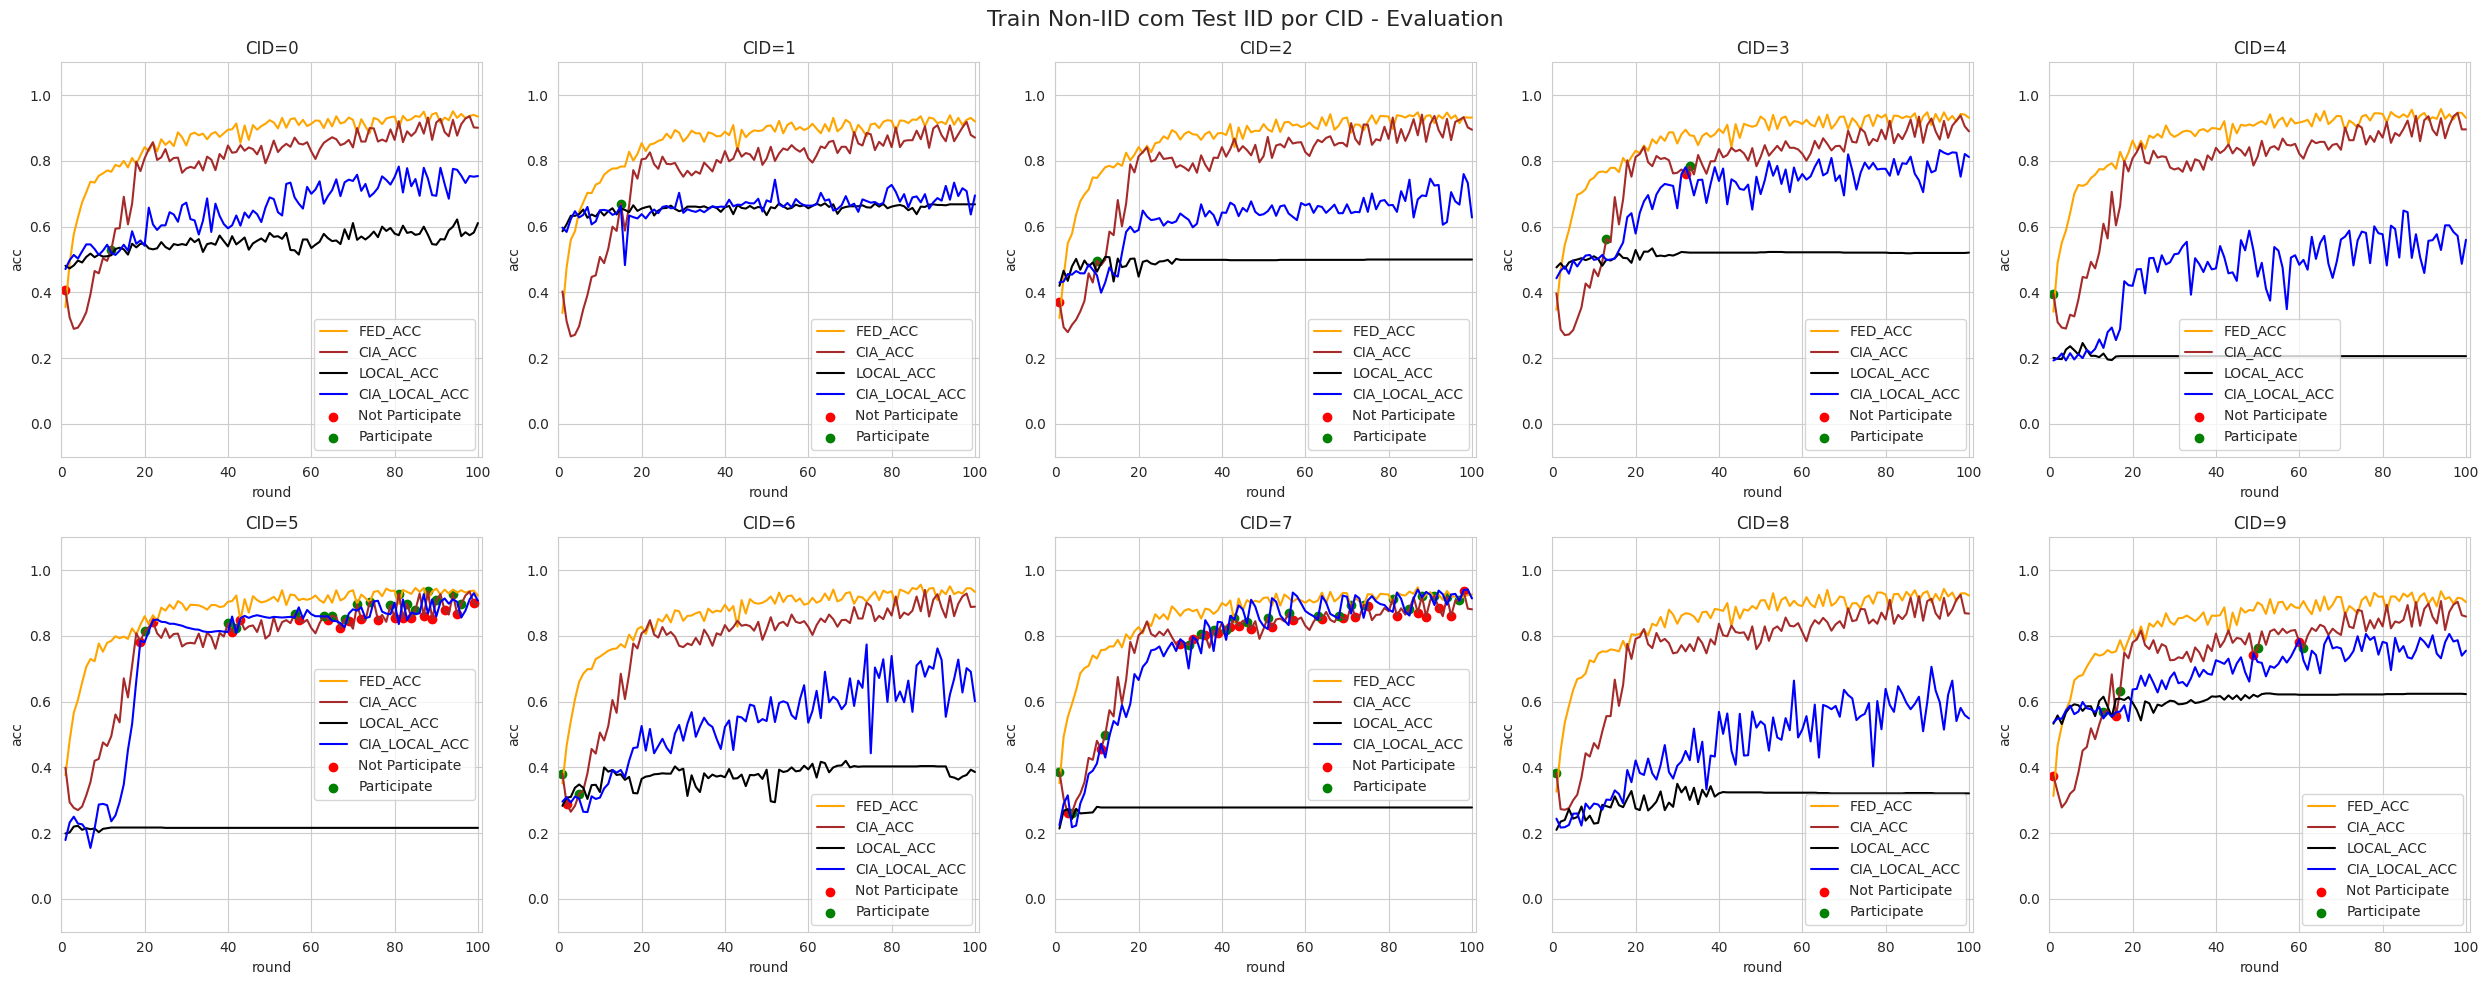

In [218]:
# ROUNDS

# df_train_ec = pd.read_csv('logs/train_ec.csv', names=['cid', 'fed_acc', 'local_acc','cia_acc',"participate", 'round'])
# df_train_nec = pd.read_csv('logs/train_nec.csv', names=['cid', 'fed_acc', 'local_acc','cia_acc',"participate", 'round'])
# df_train = pd.concat([df_train_ec, df_train_nec])
df_test  = pd.read_csv('logs/eval.csv', names=['cid', 'fed_acc', 'local_acc','cia_acc','cia_local',"participate", 'round'])
df_engagement = pd.read_csv('logs/engagement.csv', names=['cid', 'round', 'change'])
merge_data = pd.merge(df_test, df_engagement, how='outer', left_on=['cid', 'round'], right_on=['cid', 'round'])
# merge_data
# df_train.shape
values = []
fig, axes = plt.subplots(2,5, figsize=(25,10))

clients = 10
for i in range(clients):
    k = i//5
    l = i%5
    client_data = merge_data.loc[merge_data['cid'] ==i]
    axes[k][l].plot(client_data['round'], client_data['fed_acc'], label="FED_ACC", c='orange')
    axes[k][l].plot(client_data['round'], client_data['cia_acc'], label="CIA_ACC", c='brown')
    axes[k][l].plot(client_data['round'], client_data['local_acc'], label="LOCAL_ACC", c='black')
    axes[k][l].plot(client_data['round'], client_data['cia_local'], label="CIA_LOCAL_ACC", c='blue')
    is_change = client_data.loc[client_data['change'] == 1]
    if is_change.shape[0] > 0:
        data_true = is_change.loc[is_change['participate'] == True]
        data_false = is_change.loc[is_change['participate'] == False]
        axes[k][l].scatter(data_true['round'], data_true['cia_acc'], label="Not Participate", c='red')
        axes[k][l].scatter(data_false['round'], data_false['cia_acc'], label="Participate", c='green')
    axes[k][l].set_xlabel("round")
    axes[k][l].set_ylabel('acc')
    axes[k][l].set_xlim((int(merge_data.min()['round'])-1, int(merge_data.max()['round'])+1))
    axes[k][l].set_ylim(-0.1, 1.1)
    axes[k][l].set_title(f"CID={i}")
    axes[k][l].legend()
fig.suptitle('Train Non-IID com Test IID por CID - Evaluation', fontsize=16)
fig.tight_layout()


<Axes: title={'center': 'loss'}, xlabel='round', ylabel='loss'>

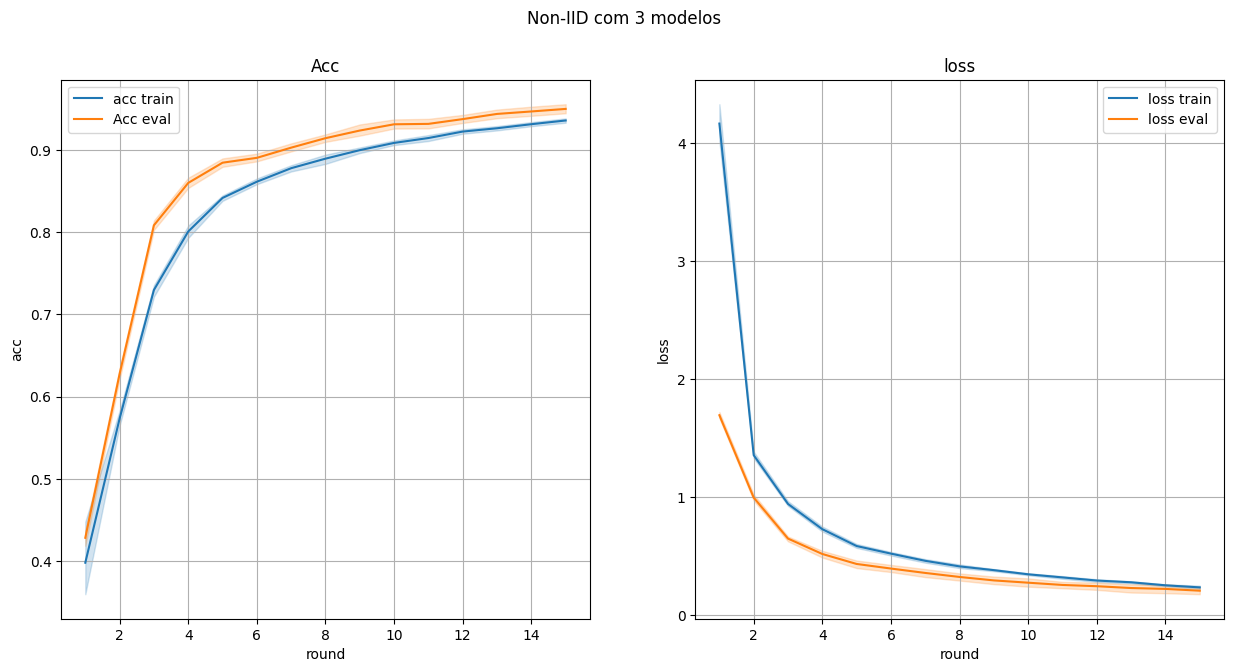

In [5]:
df_train = pd.read_csv('logs/c-fedavg-fit.csv', names=['round', 'cid', 'acc', 'loss', 'model_size', 'participate'])
df_test  = pd.read_csv('logs/c-fedavg-eval.csv', names=['round', 'cid', 'acc', 'loss', 'model_size', 'participate'])

# df_train['round'] = df_train.index//10
# df_test['round']  = df_test.index//10

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

plt.suptitle("Train noiid test iid avg")
ax[0].set_title("Acc")
ax[1].set_title("loss")

ax[0].grid(True)
ax[1].grid(True)
sns.lineplot(x='round', y='acc', data=df_train, ax=ax[0], label='acc train')
sns.lineplot(x='round', y='acc', data=df_test, ax=ax[0], label='Acc eval')

sns.lineplot(x='round', y='loss', data=df_train, ax=ax[1], label='loss train')
sns.lineplot(x='round', y='loss', data=df_test, ax=ax[1], label='loss eval')


(-0.1, 1.1)

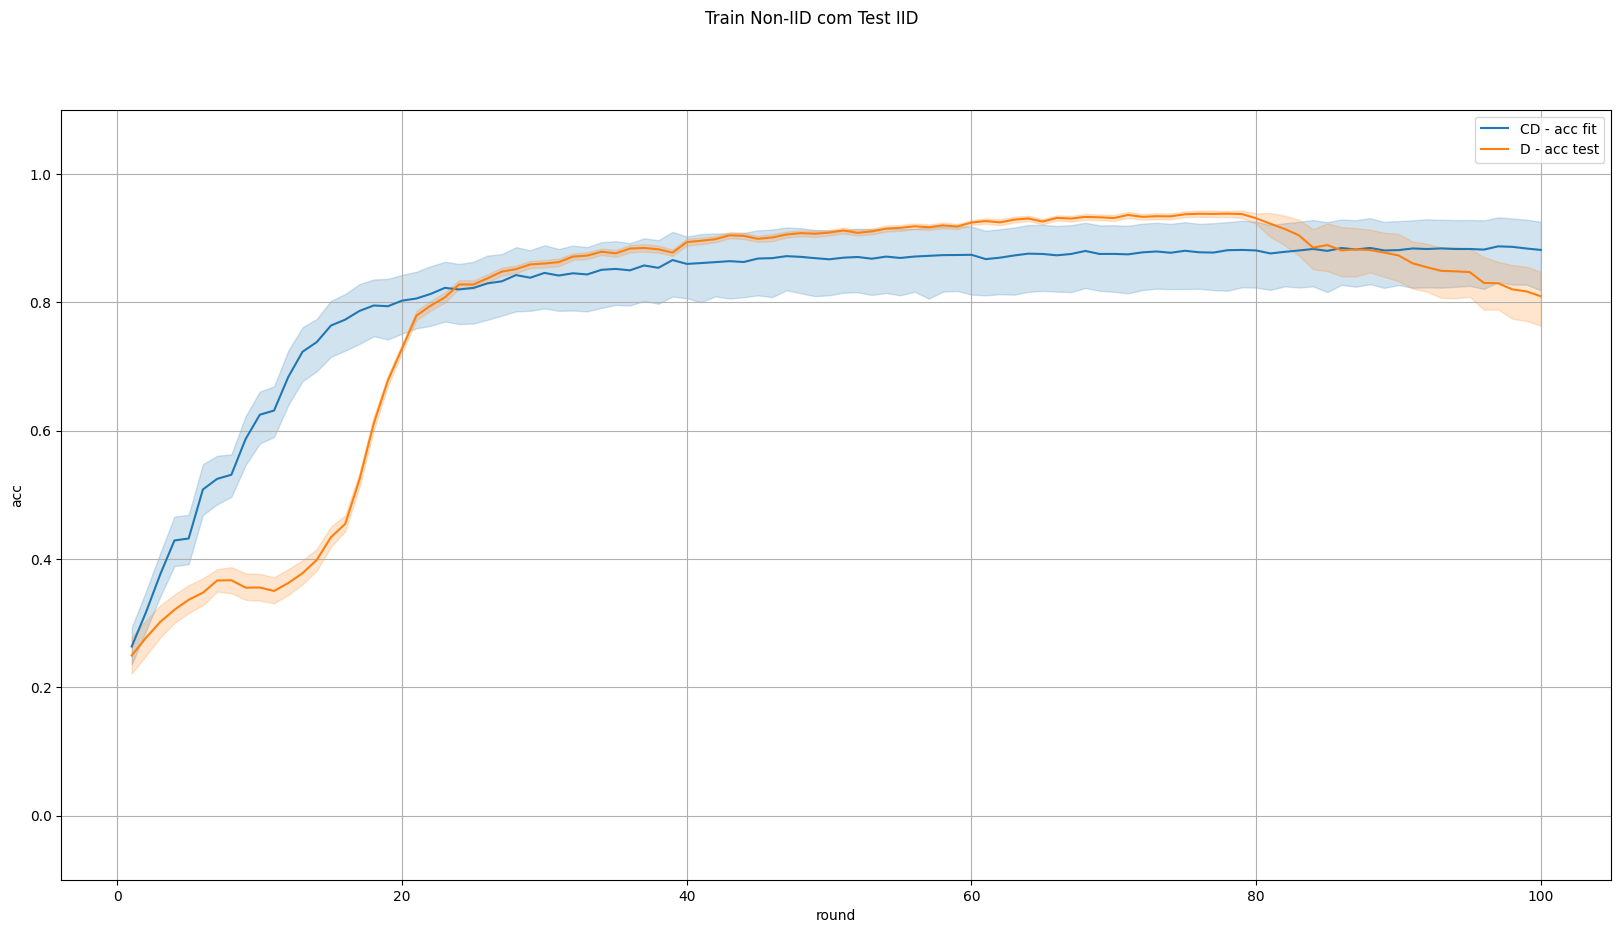

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.suptitle("Train Non-IID com Test IID")
# ax[0].set_title("FIT")
# ax[1].set_title("Evaluate")

ax.grid(True)


cd_df_test = pd.read_csv('logs/deev/MNIST/50/engaged_0.25/dirichlet_0.1/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
d_df_test  = pd.read_csv('logs/deev/deev/MNIST/50/engaged_0.25/dirichlet_0.1/c-deev-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])


linestyles = ['-', '--', '-.', ':', (0, (3, 5, 1, 5))]
sns.lineplot(x='round', y='acc', data=cd_df_test, ax=ax, label='CD - acc fit', linestyle=linestyles[0])

sns.lineplot(x='round', y='acc', data=d_df_test, ax=ax, label='D - acc test', linestyle=linestyles[0])

# sns.lineplot(x='round', y='cia_local', data=df_test, ax=ax[1], label='Local CIA Acc')
ax.set_ylim(-0.1, 1.1)

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_sub'

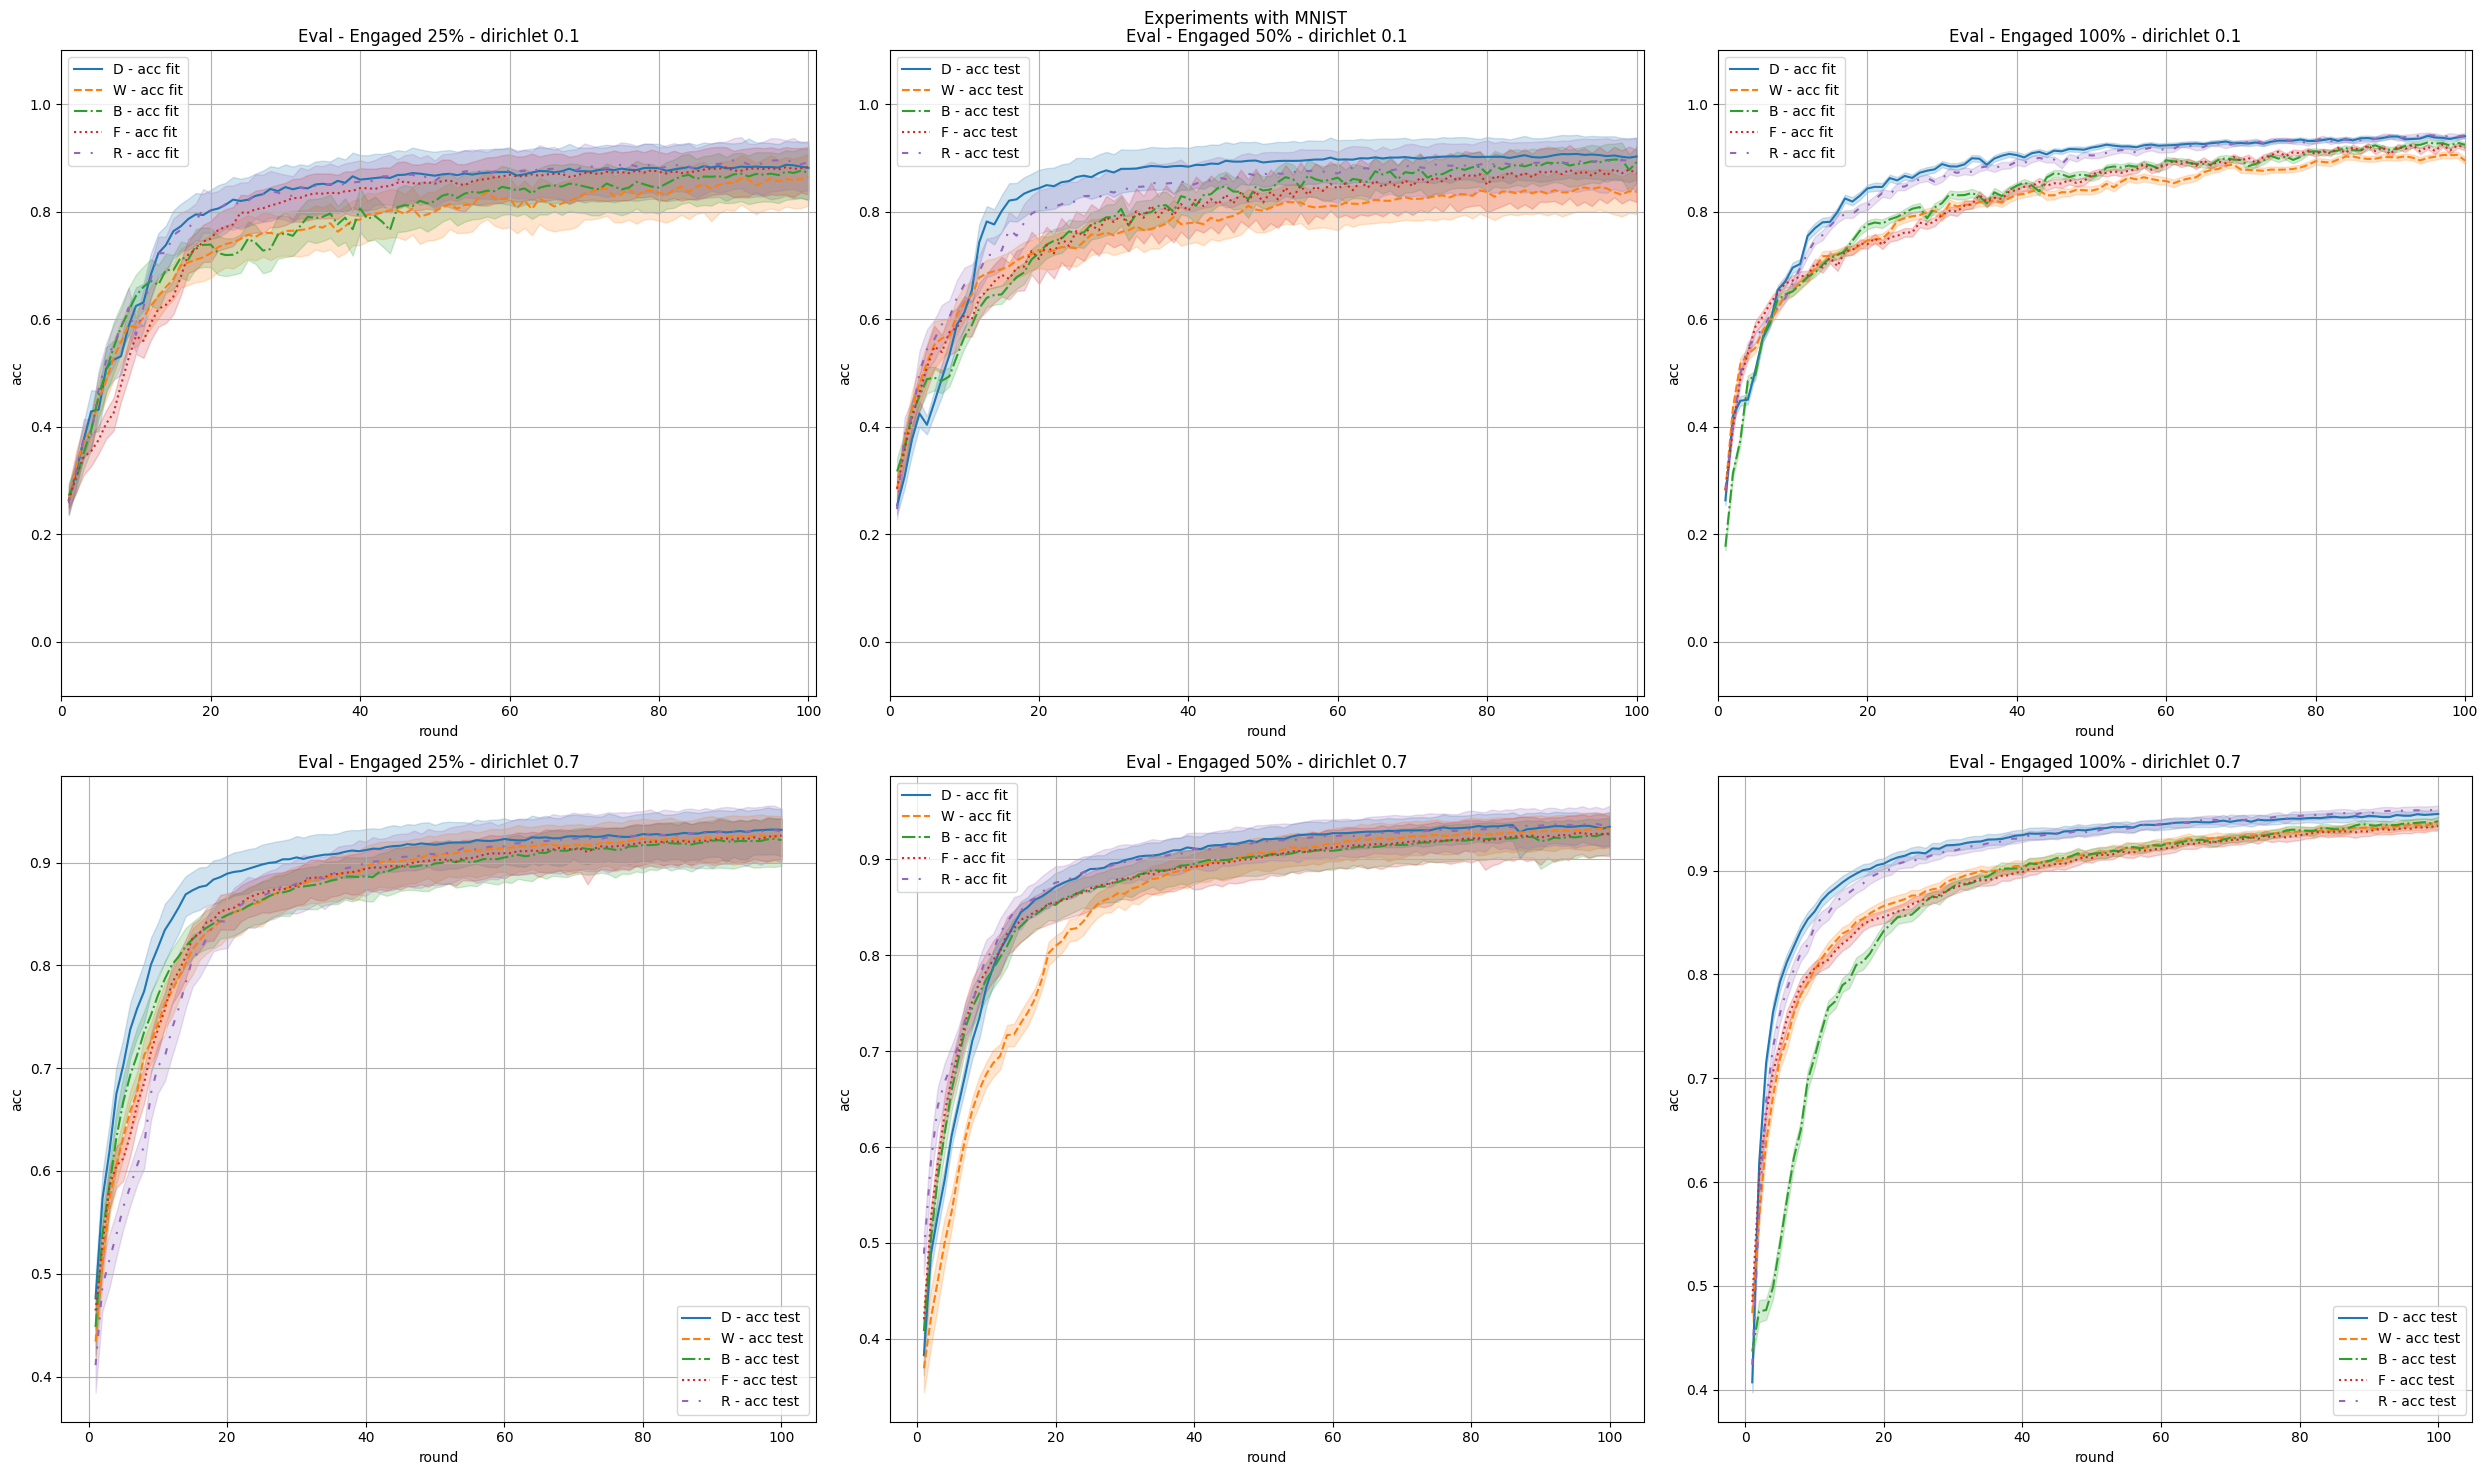

In [13]:
fig, ax = plt.subplots(2, 3, figsize=(25, 15))
plt.suptitle("Experiments with MNIST")
ax[0][0].set_title("Eval - Engaged 25% - dirichlet 0.1")
ax[0][1].set_title("Eval - Engaged 50% - dirichlet 0.1")
ax[0][2].set_title("Eval - Engaged 100% - dirichlet 0.1")
ax[1][0].set_title("Eval - Engaged 25% - dirichlet 0.7")
ax[1][1].set_title("Eval - Engaged 50% - dirichlet 0.7")
ax[1][2].set_title("Eval - Engaged 100% - dirichlet 0.7")


ax[0][0].grid(True)
ax[0][1].grid(True)
ax[0][2].grid(True)
ax[1][0].grid(True)
ax[1][1].grid(True)
ax[1][2].grid(True)

r_df_test_1  = pd.read_csv('logs/random/MNIST/50/engaged_0.25/dirichlet_0.1/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
r_df_test_2  = pd.read_csv('logs/random/MNIST/50/engaged_0.5/dirichlet_0.1/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
r_df_test_3  = pd.read_csv('logs/random/MNIST/50/engaged_1.0/dirichlet_0.1/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])

r_df_test_4  = pd.read_csv('logs/random/MNIST/50/engaged_0.25/dirichlet_0.7/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
r_df_test_5  = pd.read_csv('logs/random/MNIST/50/engaged_0.5/dirichlet_0.7/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
r_df_test_6  = pd.read_csv('logs/random/MNIST/50/engaged_1.0/dirichlet_0.7/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])

w_df_test_1  = pd.read_csv('logs/worst/MNIST/50/engaged_0.25/dirichlet_0.1/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
w_df_test_2  = pd.read_csv('logs/worst/MNIST/50/engaged_0.5/dirichlet_0.1/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
w_df_test_3  = pd.read_csv('logs/worst/MNIST/50/engaged_1.0/dirichlet_0.1/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])

w_df_test_4  = pd.read_csv('logs/worst/MNIST/50/engaged_0.25/dirichlet_0.7/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
w_df_test_5  = pd.read_csv('logs/worst/MNIST/50/engaged_0.5/dirichlet_0.7/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
w_df_test_6  = pd.read_csv('logs/worst/MNIST/50/engaged_1.0/dirichlet_0.7/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])

b_df_test_1  = pd.read_csv('logs/best/MNIST/50/engaged_0.25/dirichlet_0.1/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
b_df_test_2  = pd.read_csv('logs/best/MNIST/50/engaged_0.5/dirichlet_0.1/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
b_df_test_3  = pd.read_csv('logs/best/MNIST/50/engaged_1.0/dirichlet_0.1/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])

b_df_test_4  = pd.read_csv('logs/best/MNIST/50/engaged_0.25/dirichlet_0.7/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
b_df_test_5  = pd.read_csv('logs/best/MNIST/50/engaged_0.5/dirichlet_0.7/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
b_df_test_6  = pd.read_csv('logs/best/MNIST/50/engaged_1.0/dirichlet_0.7/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])

f_df_test_1  = pd.read_csv('logs/fair/MNIST/50/engaged_0.25/dirichlet_0.1/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
f_df_test_2  = pd.read_csv('logs/fair/MNIST/50/engaged_0.5/dirichlet_0.1/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
f_df_test_3  = pd.read_csv('logs/fair/MNIST/50/engaged_1.0/dirichlet_0.1/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])

f_df_test_4  = pd.read_csv('logs/fair/MNIST/50/engaged_0.25/dirichlet_0.7/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
f_df_test_5  = pd.read_csv('logs/fair/MNIST/50/engaged_0.5/dirichlet_0.7/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
f_df_test_6  = pd.read_csv('logs/fair/MNIST/50/engaged_1.0/dirichlet_0.7/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])


d_df_test_1  = pd.read_csv('logs/deev/MNIST/50/engaged_0.25/dirichlet_0.1/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
d_df_test_2  = pd.read_csv('logs/deev/MNIST/50/engaged_0.5/dirichlet_0.1/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
d_df_test_3  = pd.read_csv('logs/deev/MNIST/50/engaged_1.0/dirichlet_0.1/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])

d_df_test_4  = pd.read_csv('logs/deev/MNIST/50/engaged_0.25/dirichlet_0.7/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
d_df_test_5  = pd.read_csv('logs/deev/MNIST/50/engaged_0.5/dirichlet_0.7/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])
d_df_test_6  = pd.read_csv('logs/deev/MNIST/50/engaged_1.0/dirichlet_0.7/c-cia-eval.csv', names=['round', 'cid','acc', 'loss', 'participate'])


# # df_train['round'] = df_train.index//10
# # df_test['round']  = df_test.index//10
linestyles = ['-', '--', '-.', ':', (0, (3, 5, 1, 5))]
sns.lineplot(x='round', y='acc', data=d_df_test_1, ax=ax[0][0], label='D - acc fit', linestyle=linestyles[0])
sns.lineplot(x='round', y='acc', data=w_df_test_1, ax=ax[0][0], label='W - acc fit', linestyle=linestyles[1])
sns.lineplot(x='round', y='acc', data=b_df_test_1, ax=ax[0][0], label='B - acc fit', linestyle=linestyles[2])
sns.lineplot(x='round', y='acc', data=f_df_test_1, ax=ax[0][0], label='F - acc fit', linestyle=linestyles[3])
sns.lineplot(x='round', y='acc', data=r_df_test_1, ax=ax[0][0], label='R - acc fit', linestyle=linestyles[4])

sns.lineplot(x='round', y='acc', data=d_df_test_2, ax=ax[0][1], label='D - acc test', linestyle=linestyles[0])
sns.lineplot(x='round', y='acc', data=w_df_test_2, ax=ax[0][1], label='W - acc test', linestyle=linestyles[1])
sns.lineplot(x='round', y='acc', data=b_df_test_2, ax=ax[0][1], label='B - acc test', linestyle=linestyles[2])
sns.lineplot(x='round', y='acc', data=f_df_test_2, ax=ax[0][1], label='F - acc test', linestyle=linestyles[3])
sns.lineplot(x='round', y='acc', data=r_df_test_2, ax=ax[0][1], label='R - acc test', linestyle=linestyles[4])

sns.lineplot(x='round', y='acc', data=d_df_test_3, ax=ax[0][2], label='D - acc fit', linestyle=linestyles[0])
sns.lineplot(x='round', y='acc', data=w_df_test_3, ax=ax[0][2], label='W - acc fit', linestyle=linestyles[1])
sns.lineplot(x='round', y='acc', data=b_df_test_3, ax=ax[0][2], label='B - acc fit', linestyle=linestyles[2])
sns.lineplot(x='round', y='acc', data=f_df_test_3, ax=ax[0][2], label='F - acc fit', linestyle=linestyles[3])
sns.lineplot(x='round', y='acc', data=r_df_test_3, ax=ax[0][2], label='R - acc fit', linestyle=linestyles[4])

sns.lineplot(x='round', y='acc', data=d_df_test_4, ax=ax[1][0], label='D - acc test', linestyle=linestyles[0])
sns.lineplot(x='round', y='acc', data=w_df_test_4, ax=ax[1][0], label='W - acc test', linestyle=linestyles[1])
sns.lineplot(x='round', y='acc', data=b_df_test_4, ax=ax[1][0], label='B - acc test', linestyle=linestyles[2])
sns.lineplot(x='round', y='acc', data=f_df_test_4, ax=ax[1][0], label='F - acc test', linestyle=linestyles[3])
sns.lineplot(x='round', y='acc', data=r_df_test_4, ax=ax[1][0], label='R - acc test', linestyle=linestyles[4])

sns.lineplot(x='round', y='acc', data=d_df_test_5, ax=ax[1][1], label='D - acc fit', linestyle=linestyles[0])
sns.lineplot(x='round', y='acc', data=w_df_test_5, ax=ax[1][1], label='W - acc fit', linestyle=linestyles[1])
sns.lineplot(x='round', y='acc', data=b_df_test_5, ax=ax[1][1], label='B - acc fit', linestyle=linestyles[2])
sns.lineplot(x='round', y='acc', data=f_df_test_5, ax=ax[1][1], label='F - acc fit', linestyle=linestyles[3])
sns.lineplot(x='round', y='acc', data=r_df_test_5, ax=ax[1][1], label='R - acc fit', linestyle=linestyles[4])

sns.lineplot(x='round', y='acc', data=d_df_test_6, ax=ax[1][2], label='D - acc test', linestyle=linestyles[0])
sns.lineplot(x='round', y='acc', data=w_df_test_6, ax=ax[1][2], label='W - acc test', linestyle=linestyles[1])
sns.lineplot(x='round', y='acc', data=b_df_test_6, ax=ax[1][2], label='B - acc test', linestyle=linestyles[2])
sns.lineplot(x='round', y='acc', data=f_df_test_6, ax=ax[1][2], label='F - acc test', linestyle=linestyles[3])
sns.lineplot(x='round', y='acc', data=r_df_test_6, ax=ax[1][2], label='R - acc test', linestyle=linestyles[4])



ax[0][0].set_xlim((int(r_df_test_1.min()['round'])-1, int(r_df_test_1.max()['round'])+1))
ax[0][1].set_xlim((int(r_df_test_1.min()['round'])-1, int(r_df_test_1.max()['round'])+1))
ax[0][2].set_xlim((int(r_df_test_1.min()['round'])-1, int(r_df_test_1.max()['round'])+1))
ax[0][0].set_xlim((int(r_df_test_1.min()['round'])-1, int(r_df_test_1.max()['round'])+1))
ax[0][1].set_xlim((int(r_df_test_1.min()['round'])-1, int(r_df_test_1.max()['round'])+1))
ax[0][2].set_xlim((int(r_df_test_1.min()['round'])-1, int(r_df_test_1.max()['round'])+1))

ax[0][0].set_ylim(-0.1,1.1)
ax[0][1].set_ylim(-0.1,1.1)
ax[0][2].set_ylim(-0.1,1.1)
ax[0][0].set_ylim(-0.1,1.1)
ax[0][1].set_ylim(-0.1,1.1)
ax[0][2].set_ylim(-0.1,1.1)

plt.tight_layout()


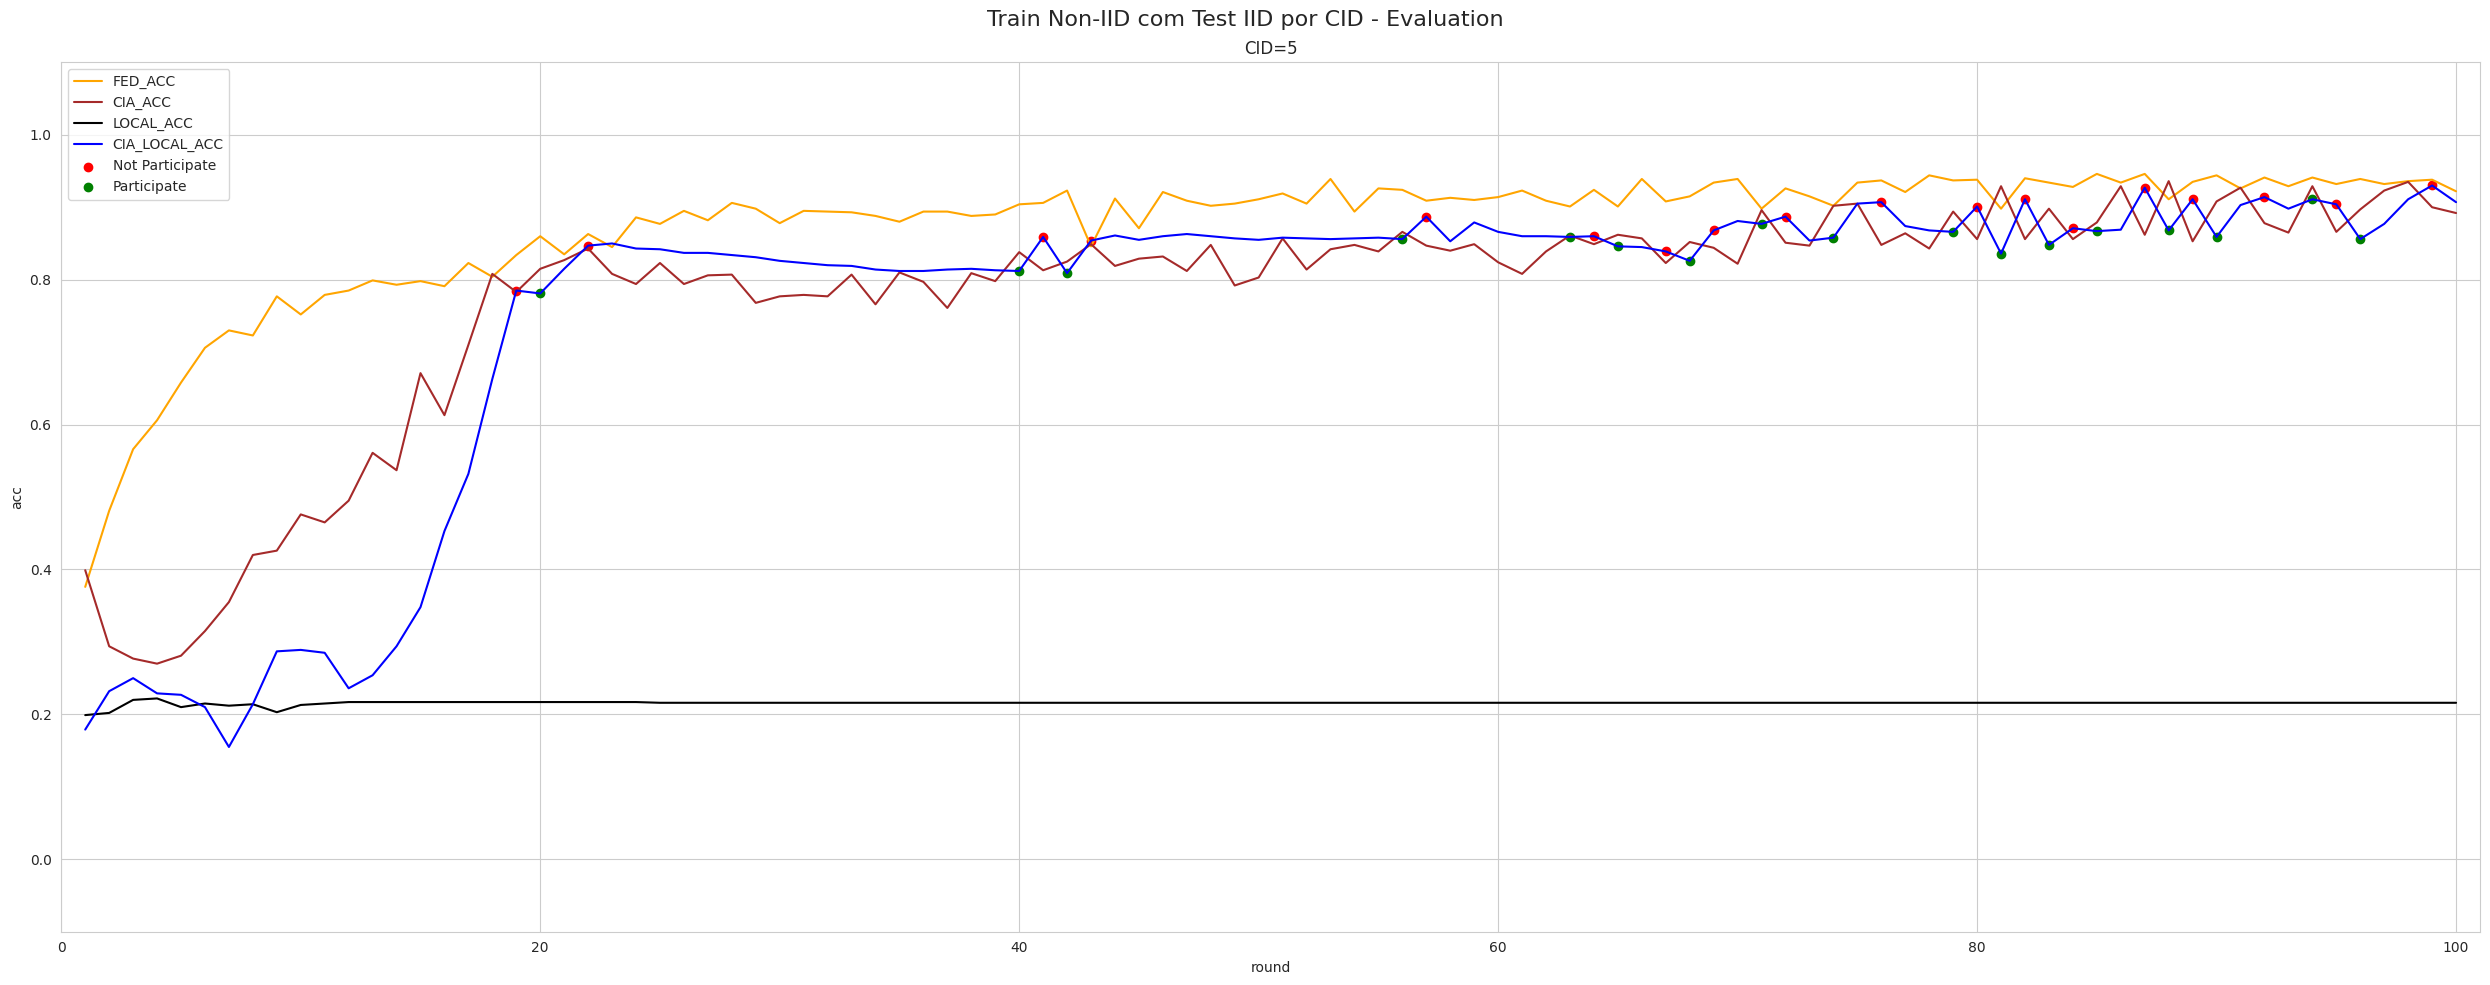

In [244]:
# ROUNDS
CLINET_ID=5
# df_train_ec = pd.read_csv('logs/train_ec.csv', names=['cid', 'fed_acc', 'local_acc','cia_acc',"participate", 'round'])
# df_train_nec = pd.read_csv('logs/train_nec.csv', names=['cid', 'fed_acc', 'local_acc','cia_acc',"participate", 'round'])
# df_train = pd.concat([df_train_ec, df_train_nec])
df_test  = pd.read_csv('logs/eval.csv', names=['cid', 'fed_acc', 'local_acc','cia_acc','cia_local',"participate", 'round'])
df_test = df_test.loc[df_test['cid'] == CLINET_ID]
df_engagement = pd.read_csv('logs/engagement.csv', names=['cid', 'round', 'change'])
df_engagement.loc[df_engagement['cid'] == CLINET_ID]
merge_data = pd.merge(df_test, df_engagement, how='outer', left_on=['cid', 'round'], right_on=['cid', 'round'])
# merge_data
# df_train.shape
values = []
fig, axes = plt.subplots(figsize=(25,10))

clients = 10

axes.plot(merge_data['round'], merge_data['fed_acc'], label="FED_ACC", c='orange')
axes.plot(merge_data['round'], merge_data['cia_acc'], label="CIA_ACC", c='brown')
axes.plot(merge_data['round'], merge_data['local_acc'], label="LOCAL_ACC", c='black')
axes.plot(merge_data['round'], merge_data['cia_local'], label="CIA_LOCAL_ACC", c='blue')
is_change = merge_data.loc[merge_data['change'] == 1]
if is_change.shape[0] > 0:
    data_true = is_change.loc[is_change['participate'] == True]
    data_false = is_change.loc[is_change['participate'] == False]
    # axes.scatter(data_true['round'], data_true['cia_acc'], label="Not Participate", c='red')
    axes.scatter(data_true['round'], data_true['cia_local'], label="Not Participate", c='red')
    # axes.scatter(data_false['round'], data_false['cia_acc'], label="Participate", c='green')
    axes.scatter(data_false['round'], data_false['cia_local'], label="Participate", c='green')
axes.set_xlabel("round")
axes.set_ylabel('acc')
axes.set_xlim((int(merge_data.min()['round'])-1, int(merge_data.max()['round'])+1))
axes.set_ylim(-0.1, 1.1)
axes.set_title(f"CID={CLINET_ID}")
axes.legend()
fig.suptitle('Train Non-IID com Test IID por CID - Evaluation', fontsize=16)
fig.tight_layout()


# POC

### Train Non-IID com Test IID

In [3]:
df_train = pd.read_csv('poc-logs-without-condition/poc-train.csv', names=['cid', 'acc', 'loss', 'participate', 'round'])
df_test  = pd.read_csv('poc-logs-without-condition/poc-eval.csv', names=['cid', 'acc', 'round'])

# df_train['round'] = df_train.index//10
# df_test['round']  = df_test.index//10

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plt.suptitle("Train Non-IID com Test IID")
ax[0].set_title("FIT")
ax[1].set_title("Evaluate")

ax[0].grid(True)
ax[1].grid(True)
sns.lineplot(x='round', y='acc', data=df_train, ax=ax[0], label='Acc')

sns.lineplot(x='round', y='acc', data=df_test, ax=ax[1], label='Acc')
plt.ylim(-0.1, 1.1)
plt.xlim(df_train.min()['round']-1, df_train.max()['round']+1)

FileNotFoundError: [Errno 2] No such file or directory: 'poc-logs-without-condition/poc-train.csv'

# DEEV

### Train Non-IID com Test IID

(0.0, 101.0)

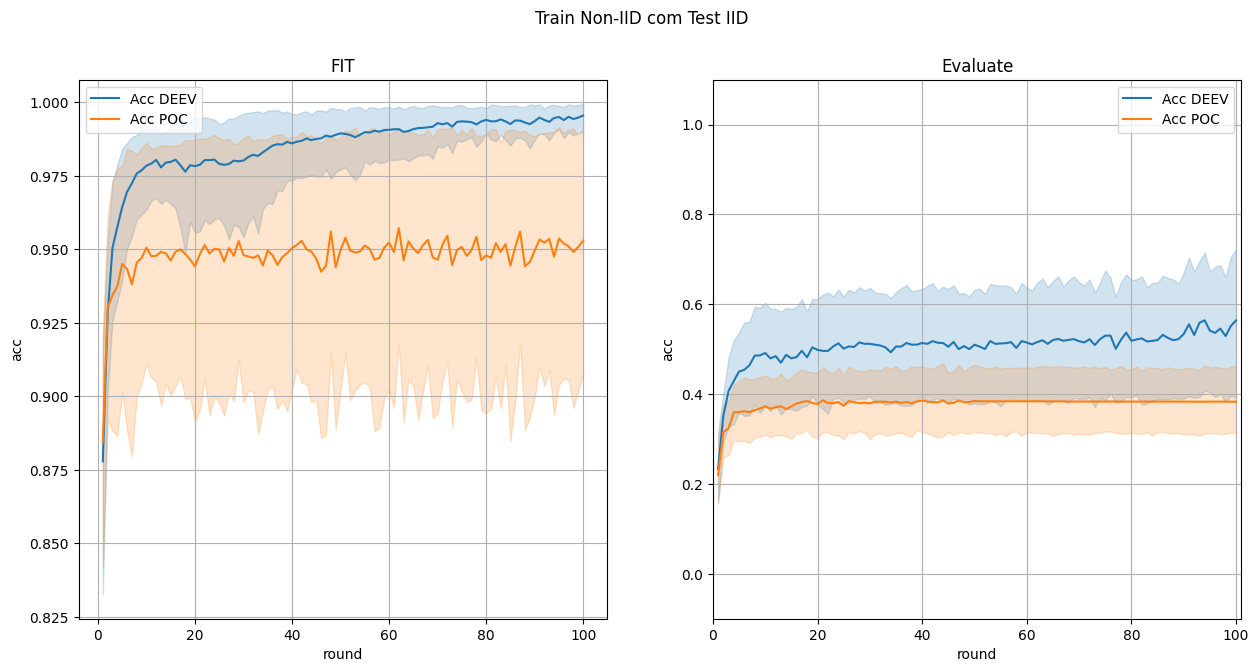

In [11]:
deev_df_train = pd.read_csv('deev-logs-without-condition/deev-train.csv', names=['cid', 'acc', 'loss', 'participate', 'round'])
deev_df_test  = pd.read_csv('deev-logs-without-condition/deev-eval.csv', names=['cid', 'acc', 'round'])

df_train = pd.read_csv('poc-logs-with-condition/poc-train.csv', names=['cid', 'acc', 'loss', 'participate', 'round'])
df_test  = pd.read_csv('poc-logs-with-condition/poc-eval.csv', names=['cid', 'acc', 'round'])



fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plt.suptitle("Train Non-IID com Test IID")
ax[0].set_title("FIT")
ax[1].set_title("Evaluate")

ax[0].grid(True)
ax[1].grid(True)
sns.lineplot(x='round', y='acc', data=deev_df_train, ax=ax[0], label='Acc DEEV')

sns.lineplot(x='round', y='acc', data=deev_df_test, ax=ax[1], label='Acc DEEV')
sns.lineplot(x='round', y='acc', data=df_train, ax=ax[0], label='Acc POC')

sns.lineplot(x='round', y='acc', data=df_test, ax=ax[1], label='Acc POC')
plt.ylim(-0.1, 1.1)
plt.xlim(df_train.min()['round']-1, df_train.max()['round']+1)

In [ ]:

# Exploração
-> Servidor envia o 